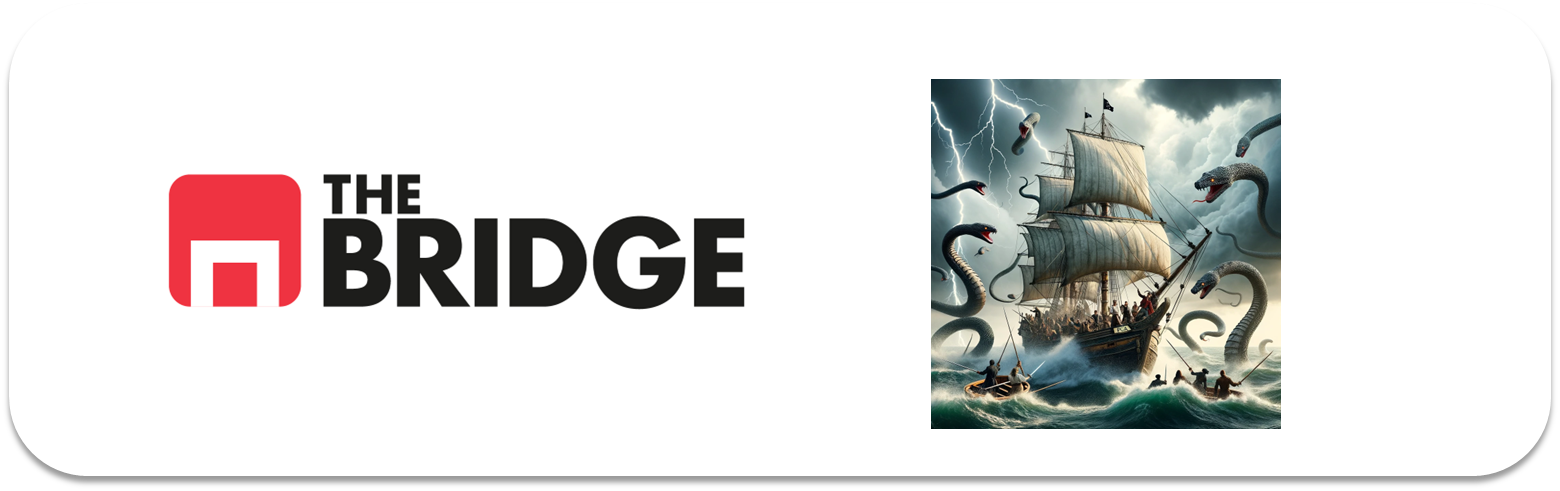

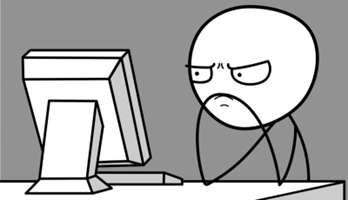

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [2]:
df = pd.read_csv('./data/breastcancer-winsconsin.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
bt.tipifica_variable_plus(df)

Umbral de 'CARD_valores_unicos' para considerarla 'Categórica':  10
Umbral de 'CARD_%' para considerarla 'Numérica Continua':  30.0


Variable  Missings_% Dtype_real  CARD_valores_unicos  \
0                        id         0.0      int64                  569   
1                 diagnosis         0.0     object                    2   
2               radius_mean         0.0    float64                  456   
3              texture_mean         0.0    float64                  479   
4            perimeter_mean         0.0    float64                  522   
5                 area_mean         0.0    float64                  539   
6           smoothness_mean         0.0    float64                  474   
7          compactness_mean         0.0    float64                  537   
8            concavity_mean         0.0    float64                  537   
9       concave points_mean         0.0    float64                  542   
10            symmetry_mean         0.0    float64                  432   
11   fractal_dimension_mean         0.0    float64                  499   
12                radius_se         0.0    float64                  540   
13               texture_se         0.0    float64                  519   
14             perimeter_se         0.0    float64                  533   
15                  area_se         0.0    float64                  528   
16            smoothness_se         0.0    float64                  547   
17           compactness_se         0.0    float64                  541   
18             concavity_se         0.0    float64                  533   
19        concave points_se         0.0    float64                  507   
20              symmetry_se         0.0    float64                  498   
21     fractal_dimension_se         0.0    float64                  545   
22             radius_worst         0.0    float64                  457   
23            texture_worst         0.0    float64                  511   
24          perimeter_worst         0.0    float64                  514   
25               area_worst         0.0    float64                  544   
26         smoothness_worst         0.0    float64                  411   
27        compactness_worst         0.0    float64                  529   
28          concavity_worst         0.0    float64                  539   
29     concave points_worst         0.0    float64                  492   
30           symmetry_worst         0.0    float64                  500   
31  fractal_dimension_worst         0.0    float64                  535   
32              Unnamed: 32       100.0    float64                    0   

    CARD_%     Dtype_sugerido  
0   100.00  Numérica Continua  
1     0.35            Binaria  
2    80.14  Numérica Continua  
3    84.18  Numérica Continua  
4    91.74  Numérica Continua  
5    94.73  Numérica Continua  
6    83.30  Numérica Continua  
7    94.38  Numérica Continua  
8    94.38  Numérica Continua  
9    95.25  Numérica Continua  
10   75.92  Numérica Continua  
11   87.70  Numérica Continua  
12   94.90  Numérica Continua  
13   91.21  Numérica Continua  
14   93.67  Numérica Continua  
15   92.79  Numérica Continua  
16   96.13  Numérica Continua  
17   95.08  Numérica Continua  
18   93.67  Numérica Continua  
19   89.10  Numérica Continua  
20   87.52  Numérica Continua  
21   95.78  Numérica Continua  
22   80.32  Numérica Continua  
23   89.81  Numérica Continua  
24   90.33  Numérica Continua  
25   95.61  Numérica Continua  
26   72.23  Numérica Continua  
27   92.97  Numérica Continua  
28   94.73  Numérica Continua  
29   86.47  Numérica Continua  
30   87.87  Numérica Continua  
31   94.02  Numérica Continua  
32    0.00         Categórica

In [4]:
# 12 medidas y muchas derivadas (media, desviación estándar y "worst" ((media de los tres valores mas grandes),
# así que seguramente una reducción de features quitando valores muy ligados o colineales podrá sentarle bien a un hipotético modelo de clasificación

### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [5]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

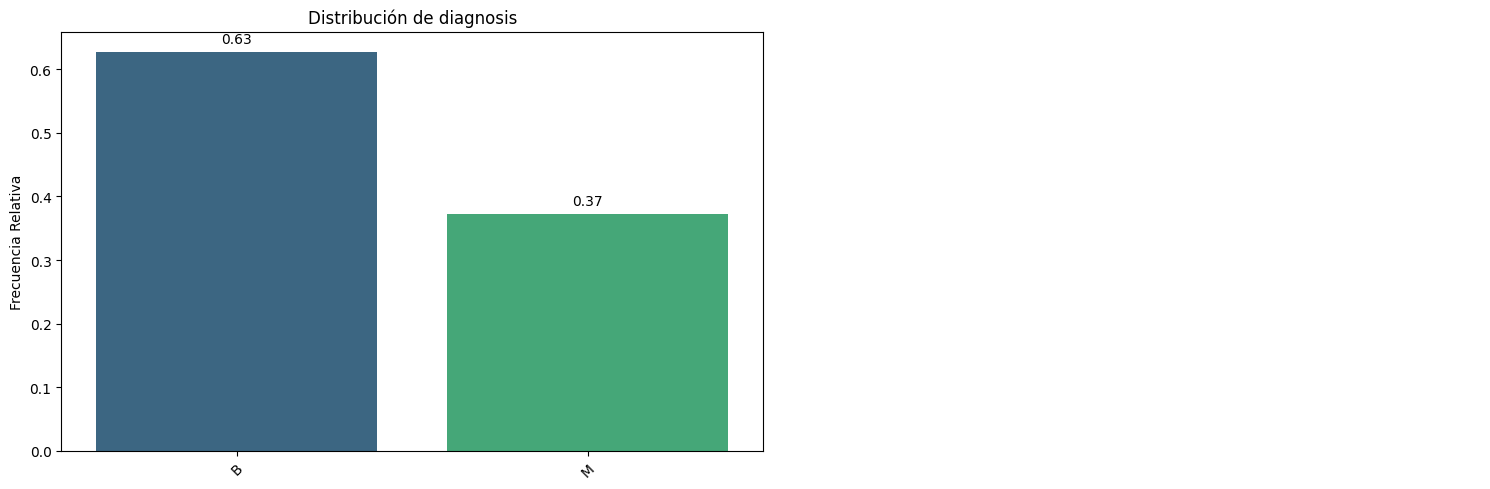

In [6]:
target = "diagnosis"

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

bt.pinta_distribucion_categoricas(df, [target], mostrar_valores=True, relativa=True)

In [7]:
# Desbalanceado

### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

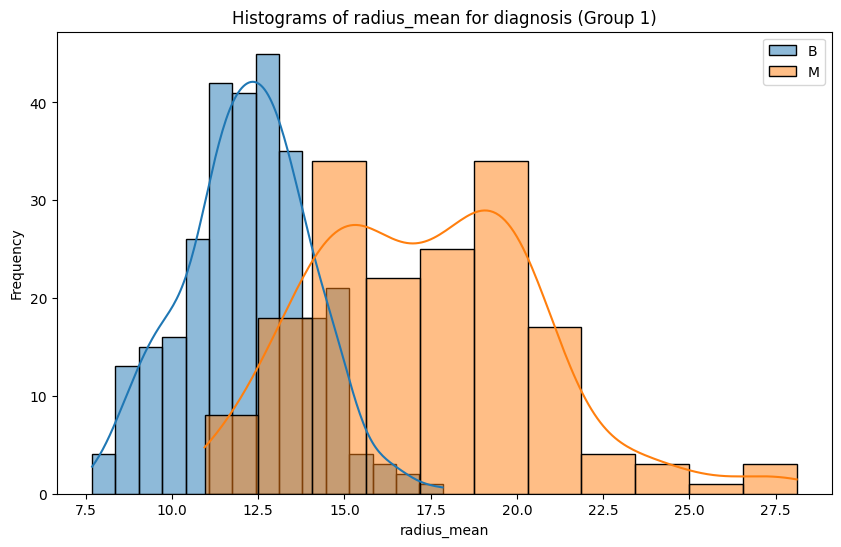

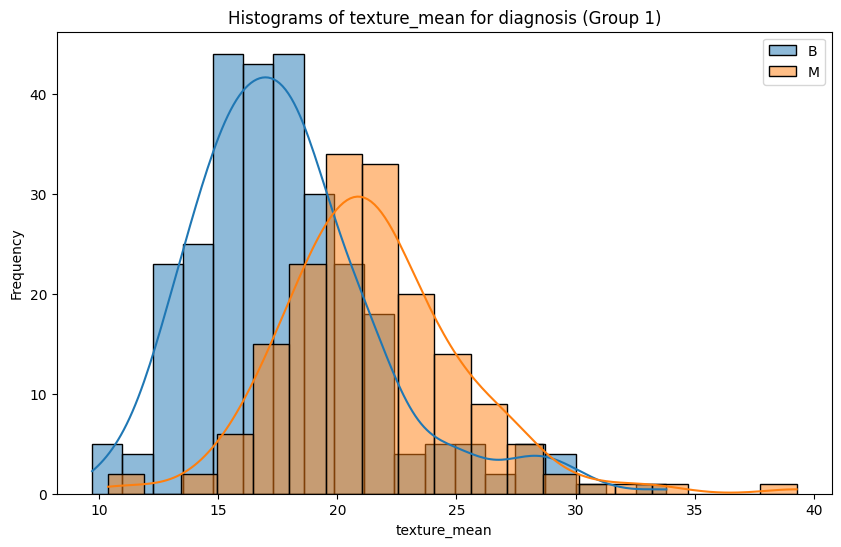

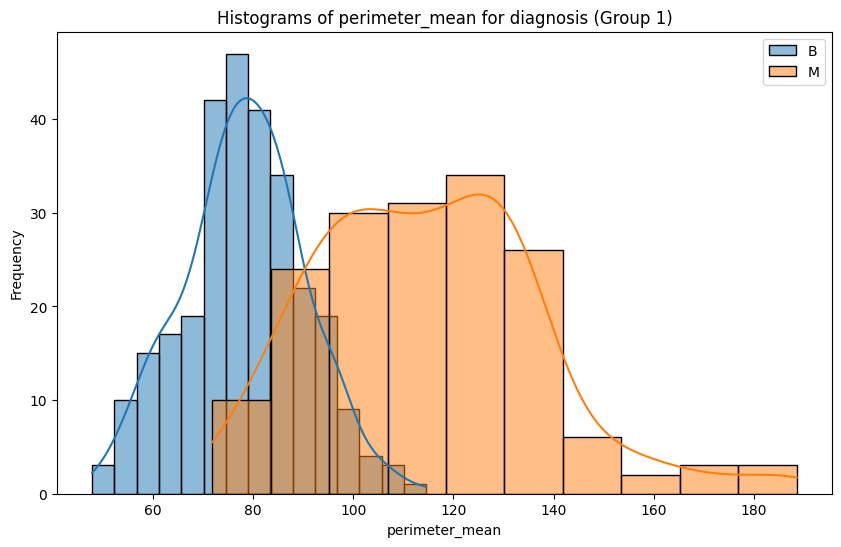

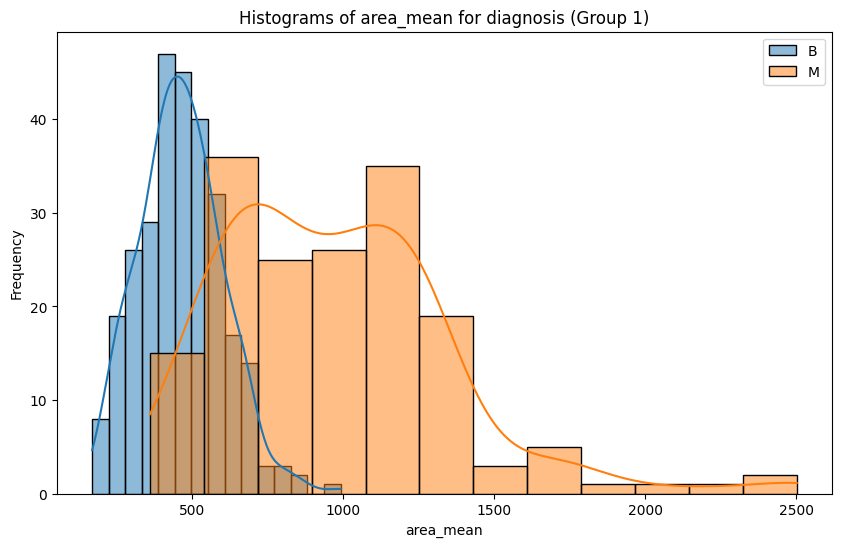

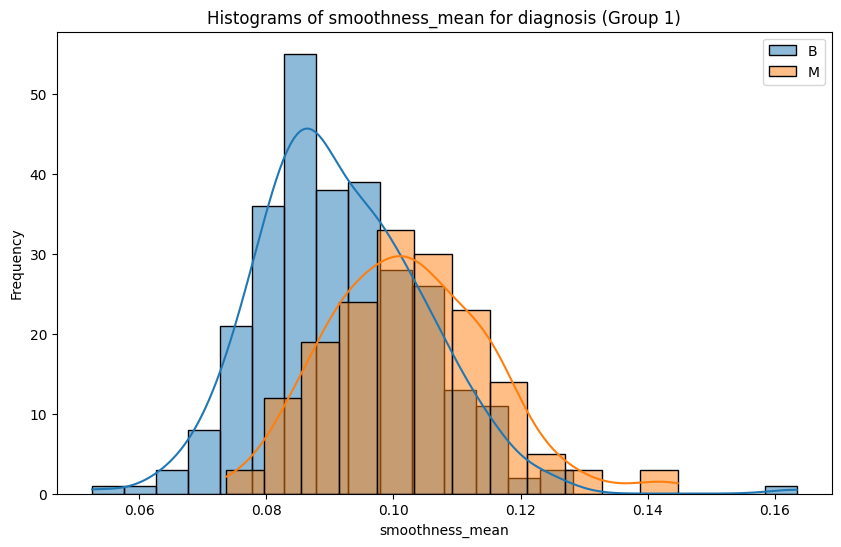

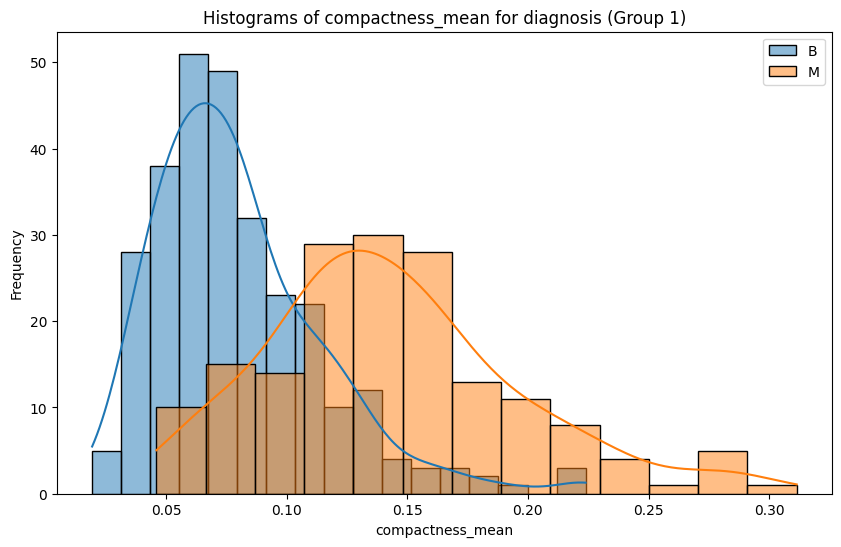

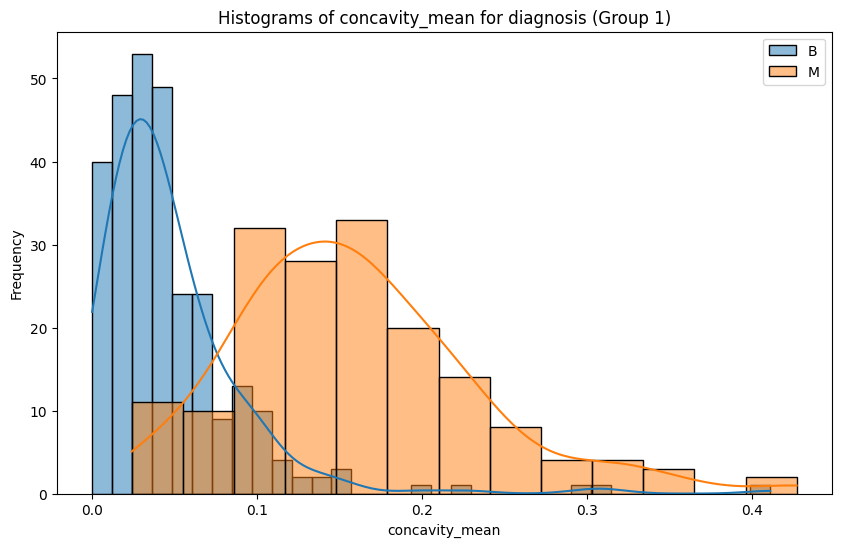

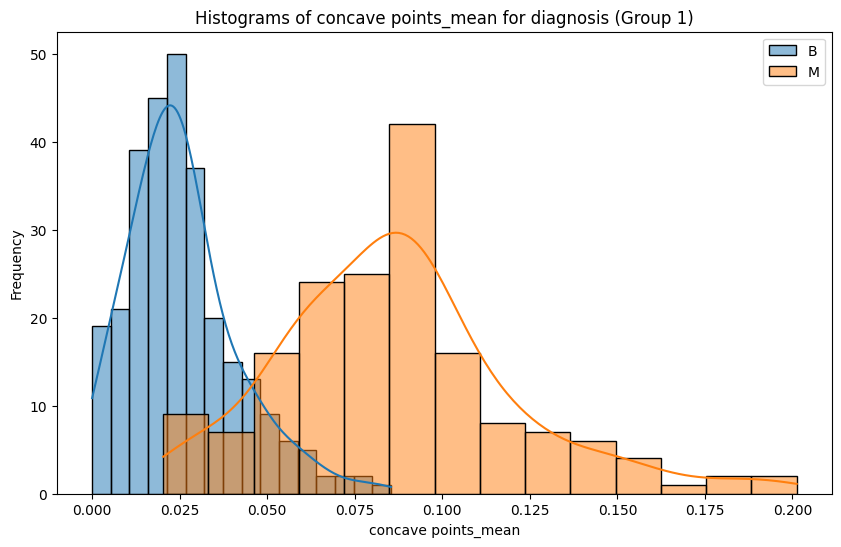

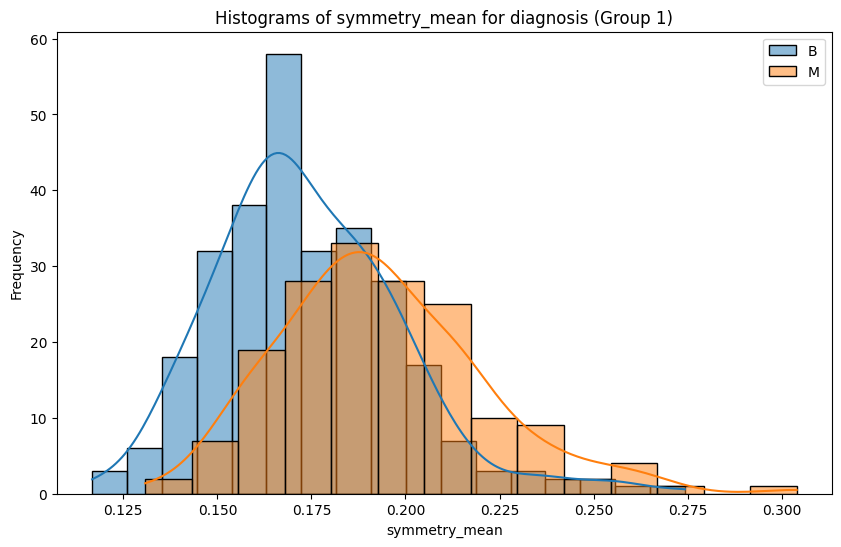

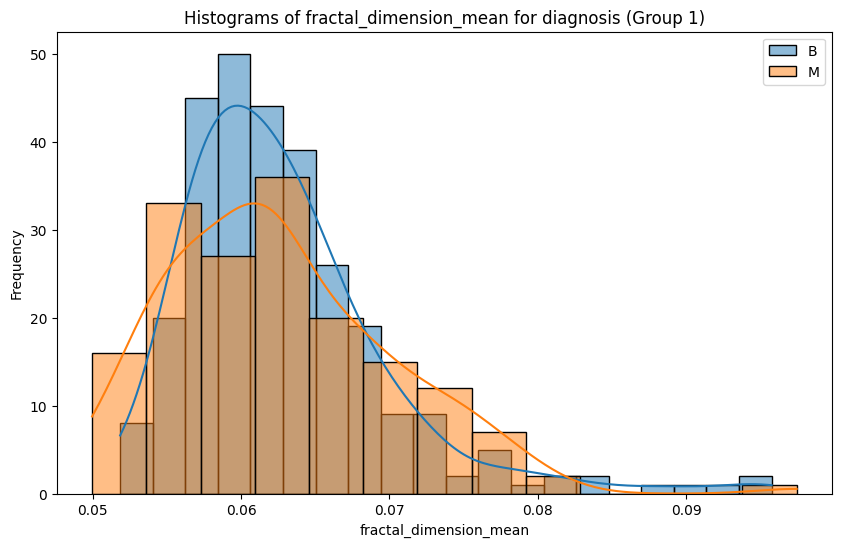

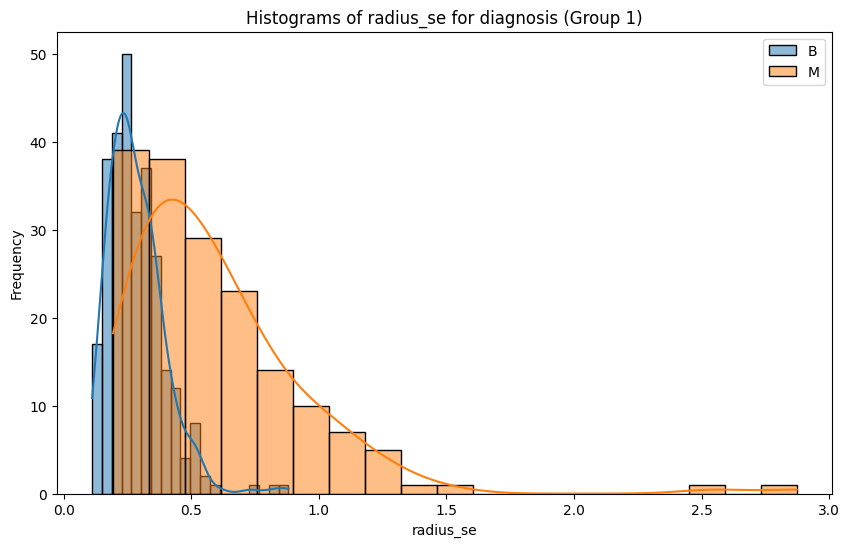

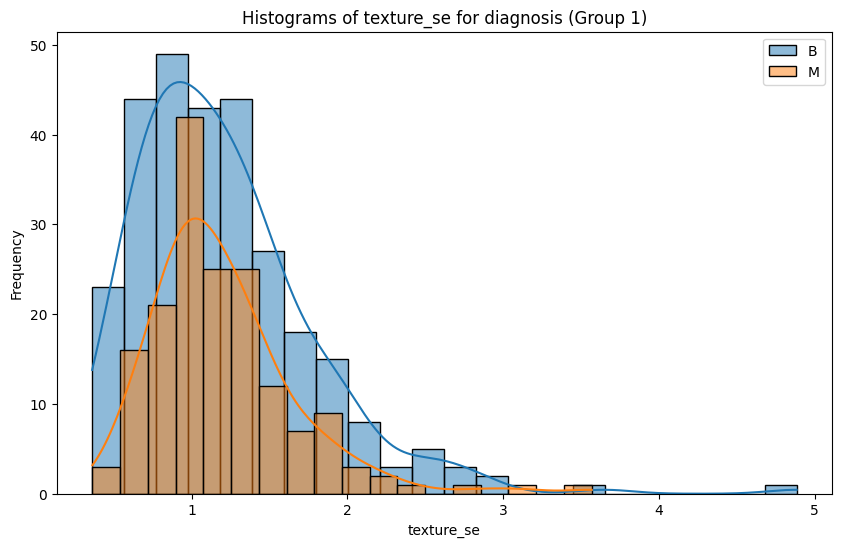

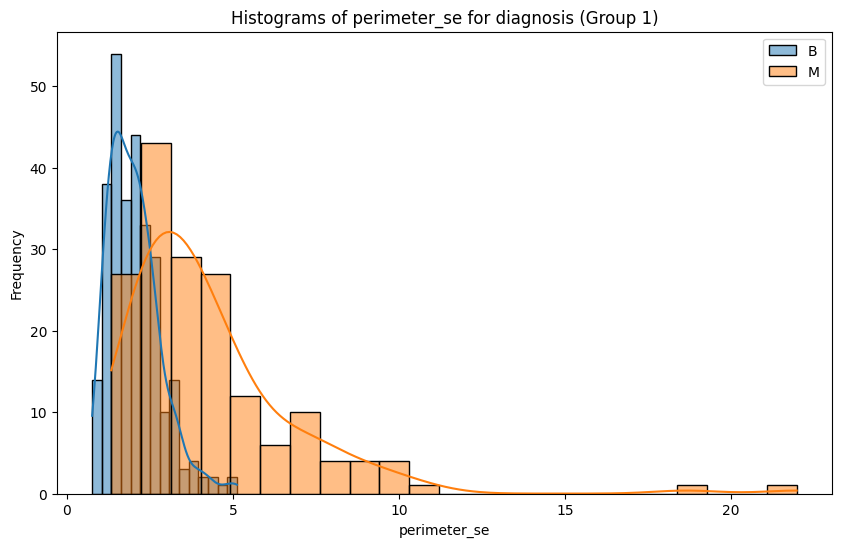

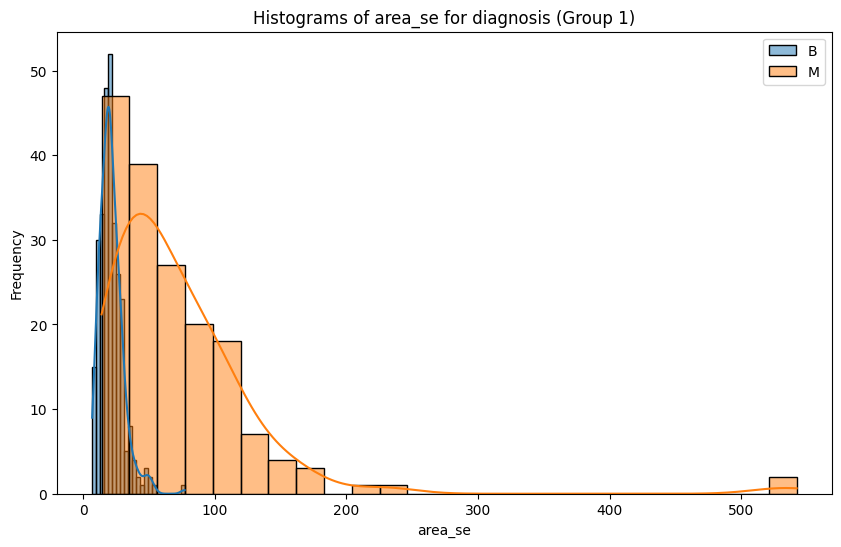

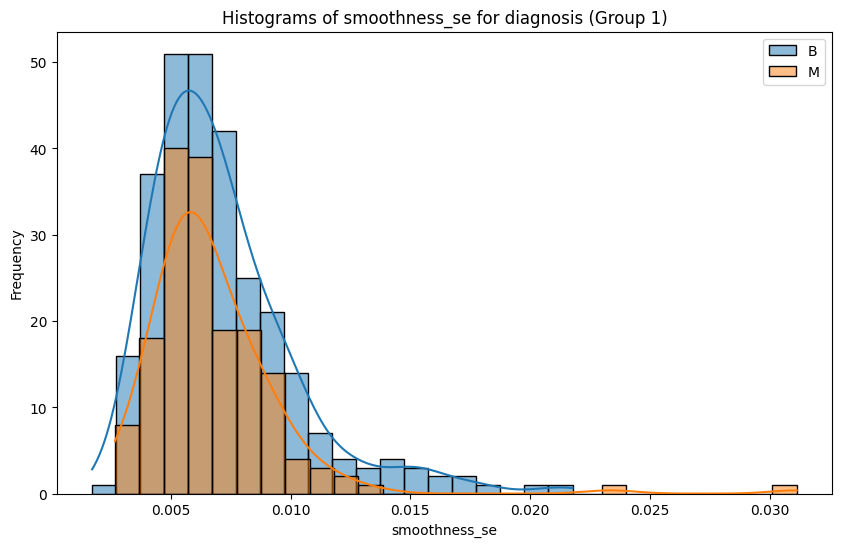

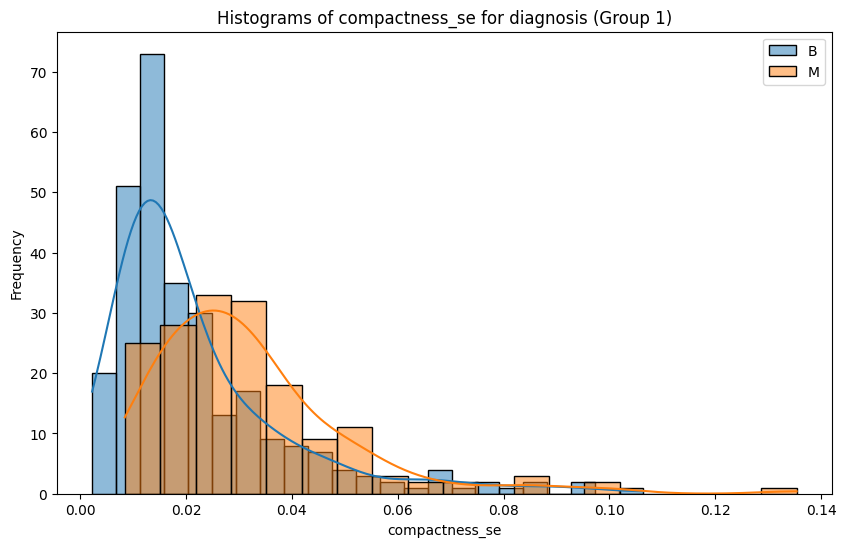

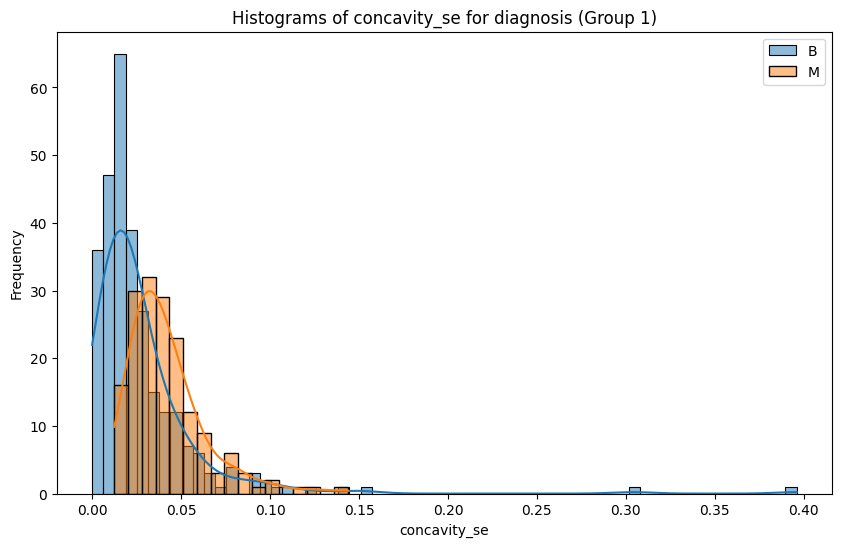

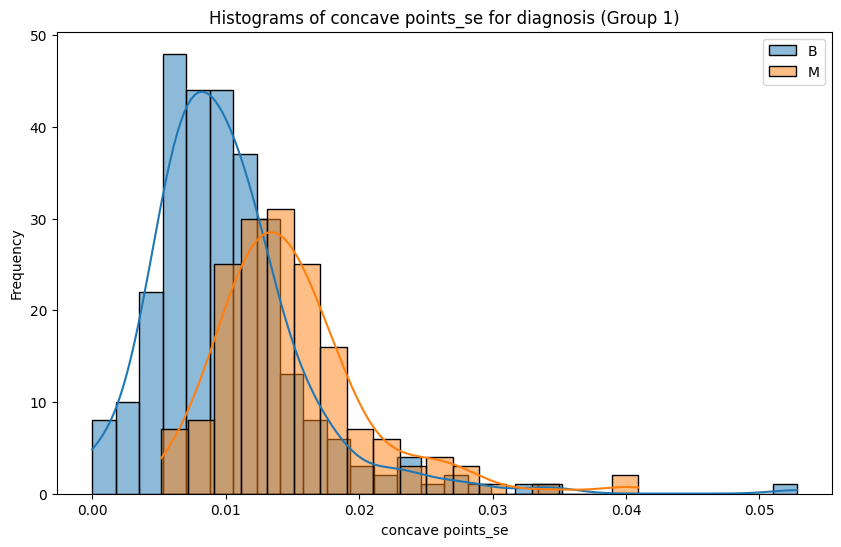

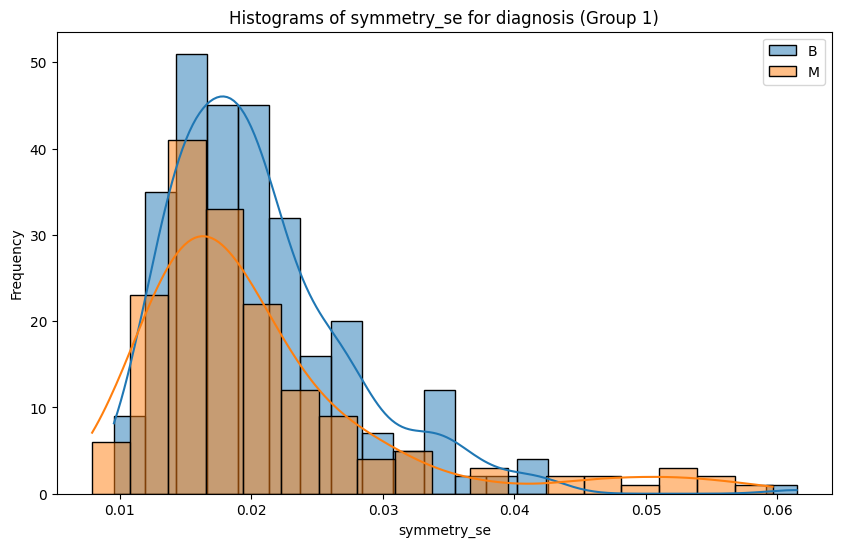

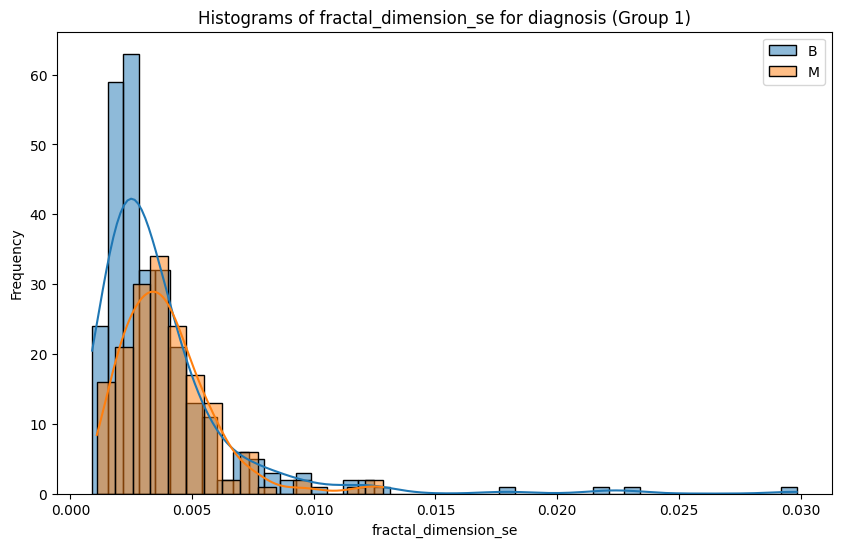

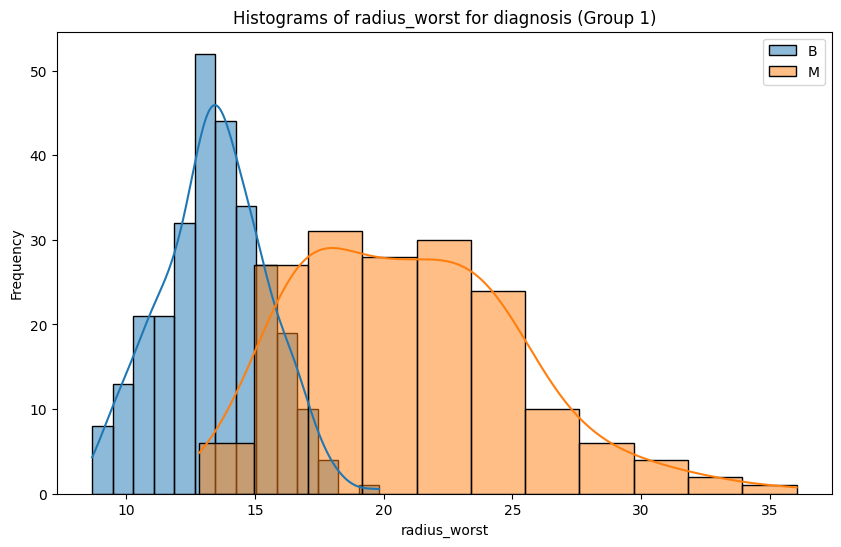

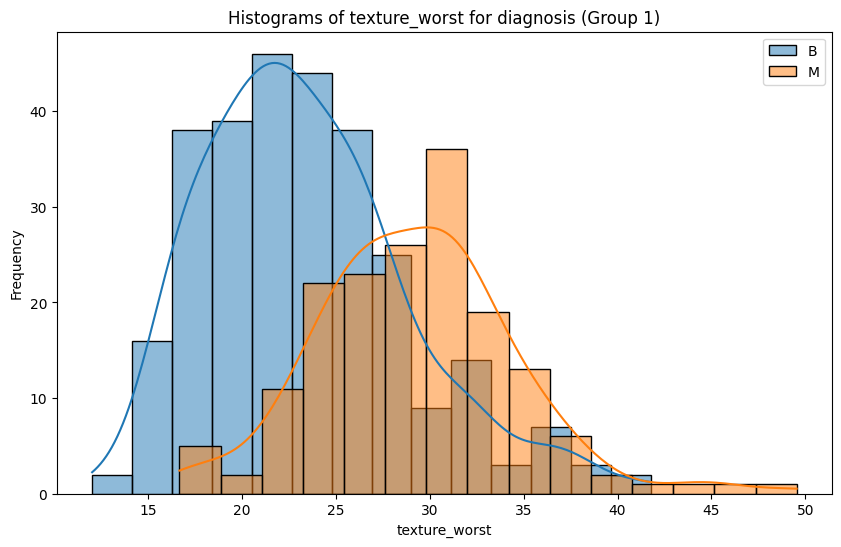

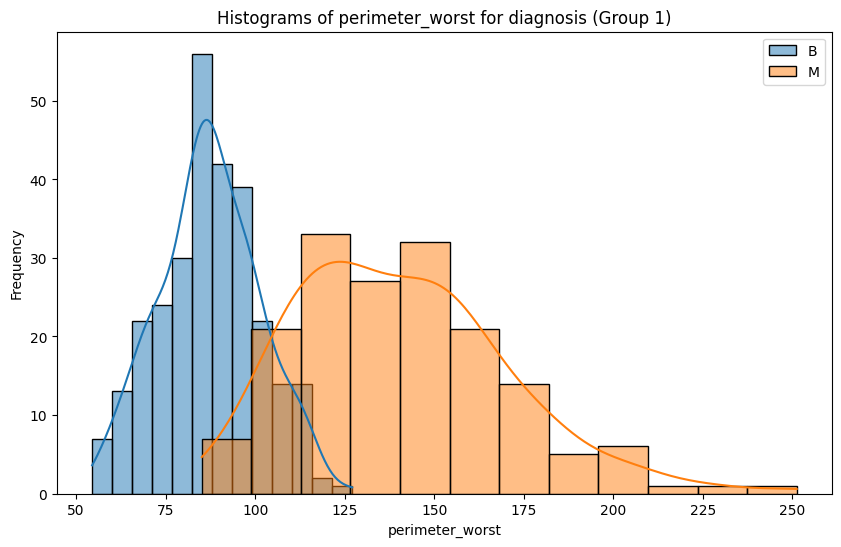

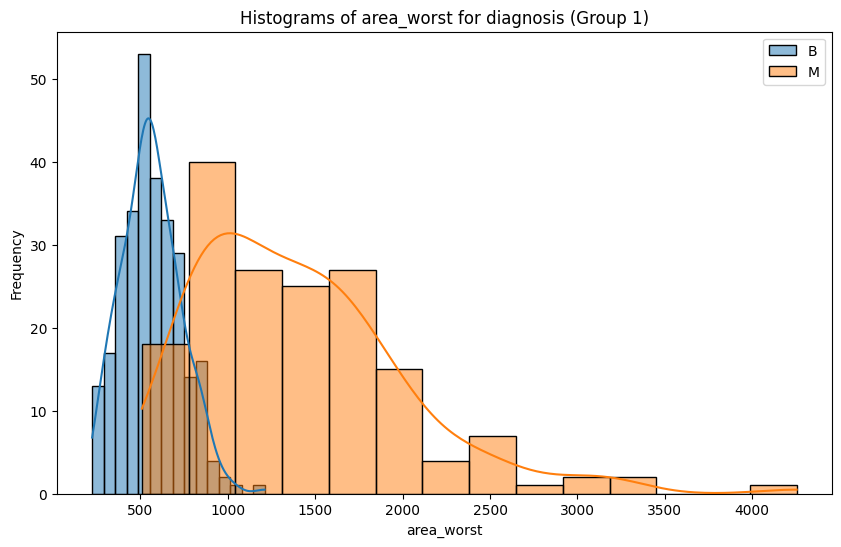

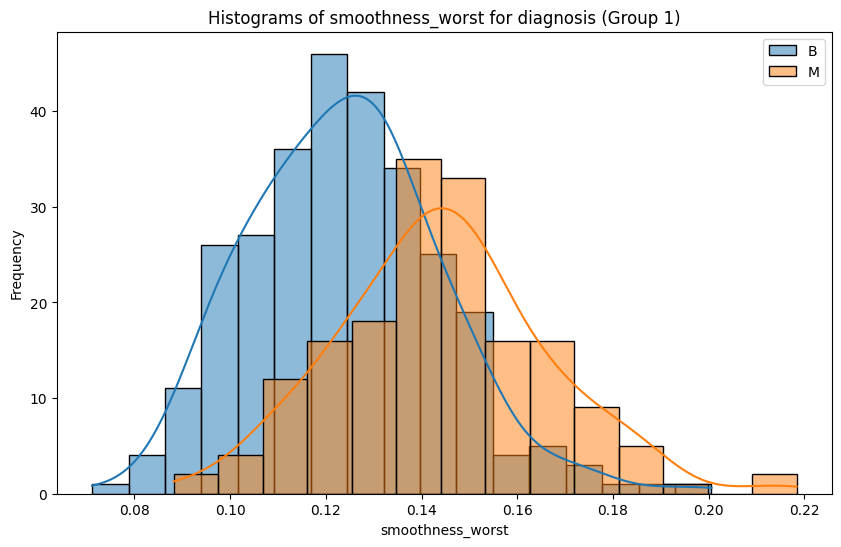

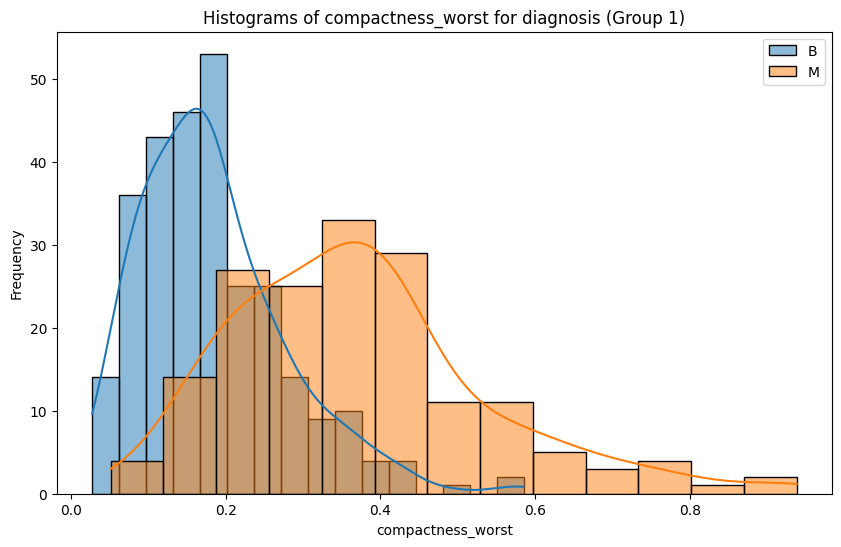

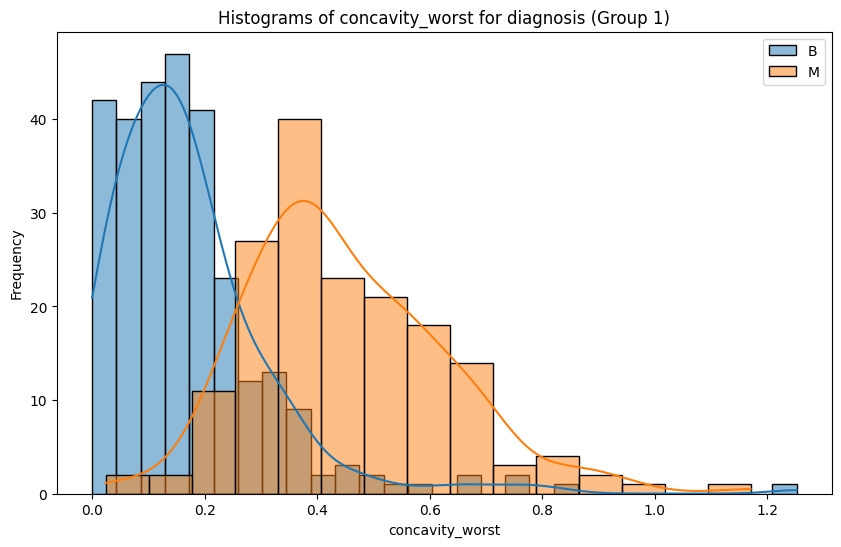

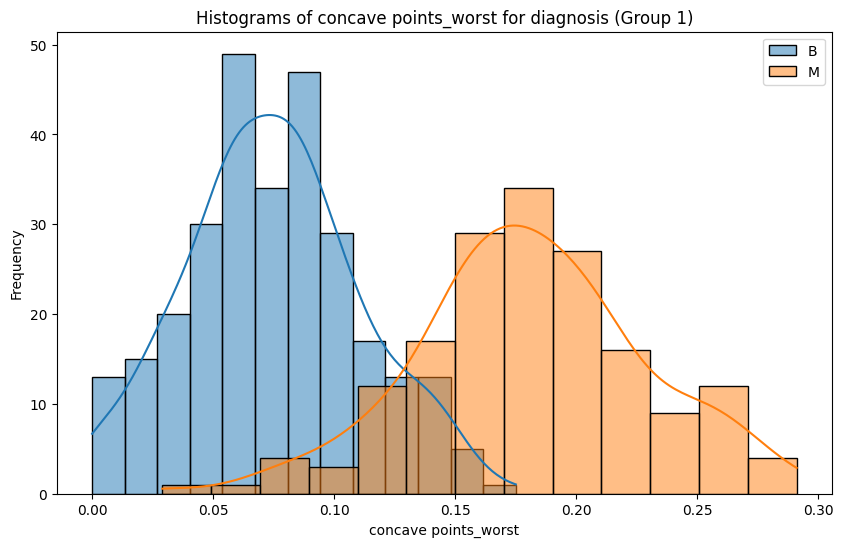

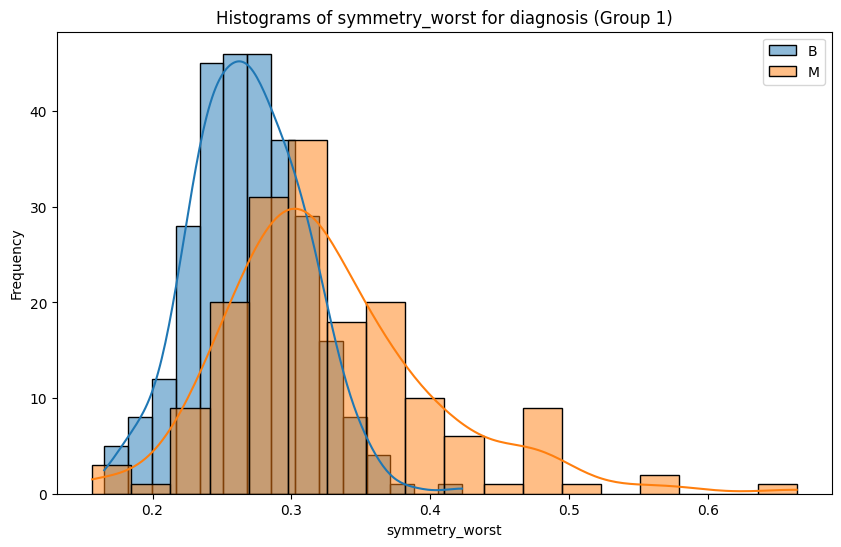

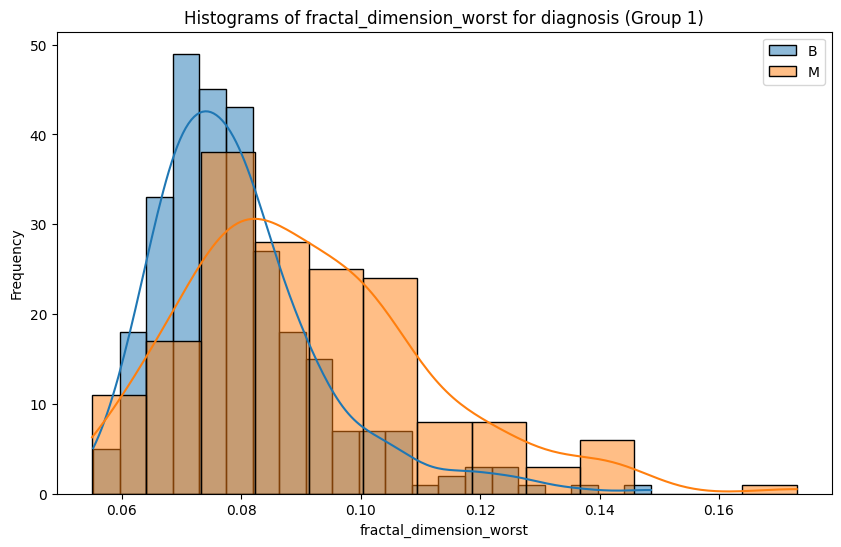

In [8]:
for col in train_set.columns:
    if col != target:
        bt.plot_grouped_histograms(train_set, target, col, group_size = 2)

In [9]:
df["diagnosis"]= df["diagnosis"].replace({"B":0,"M":1})


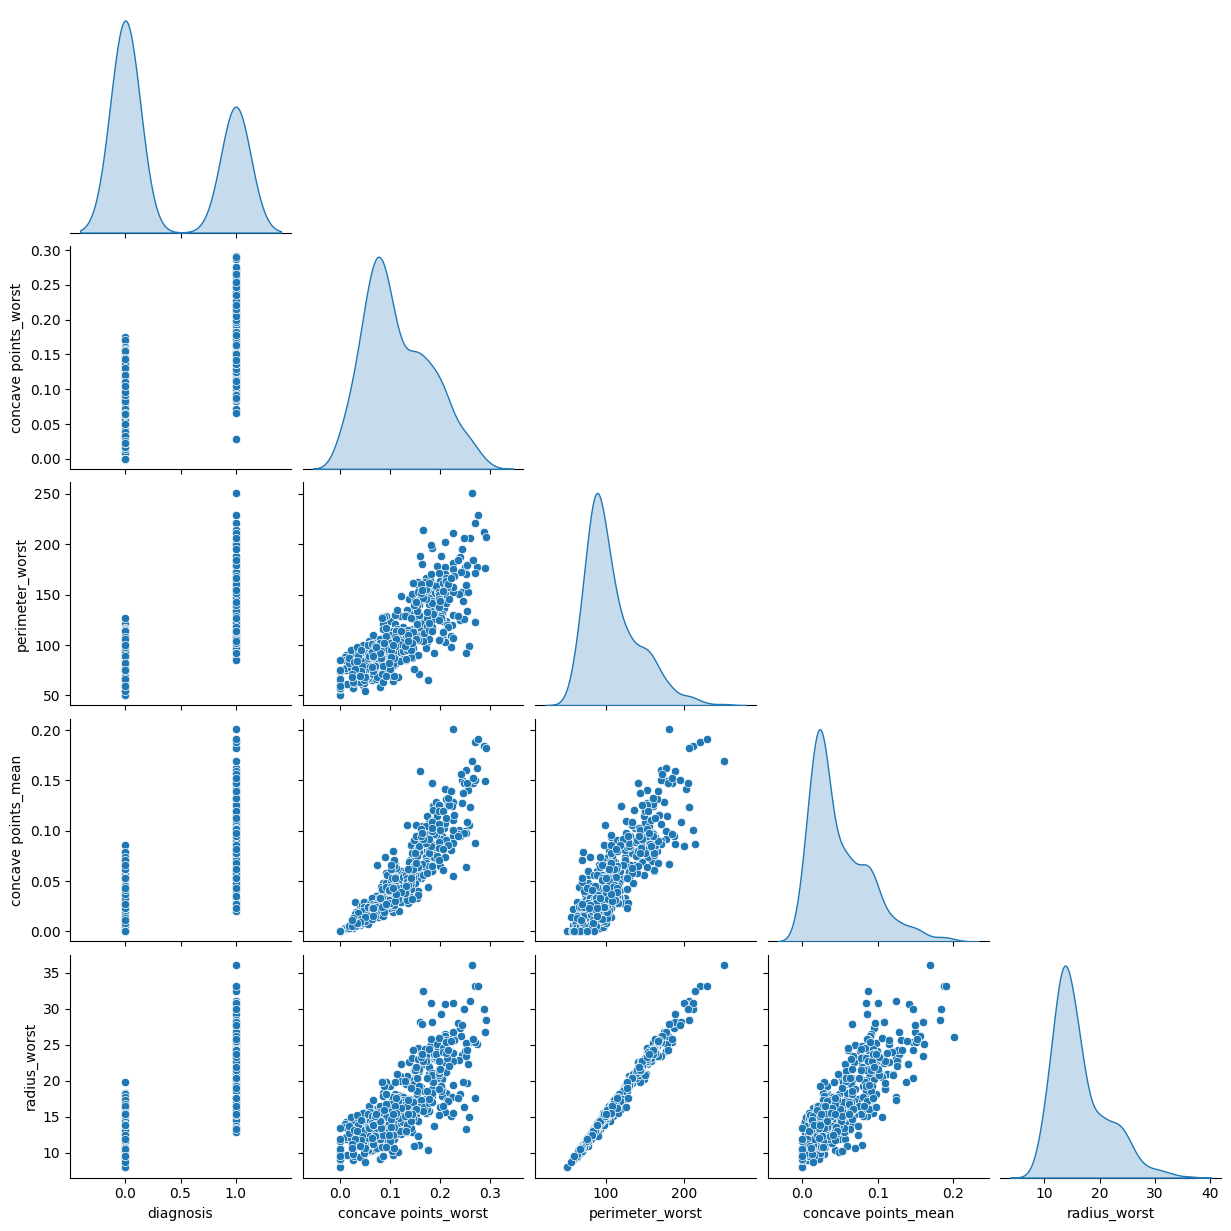

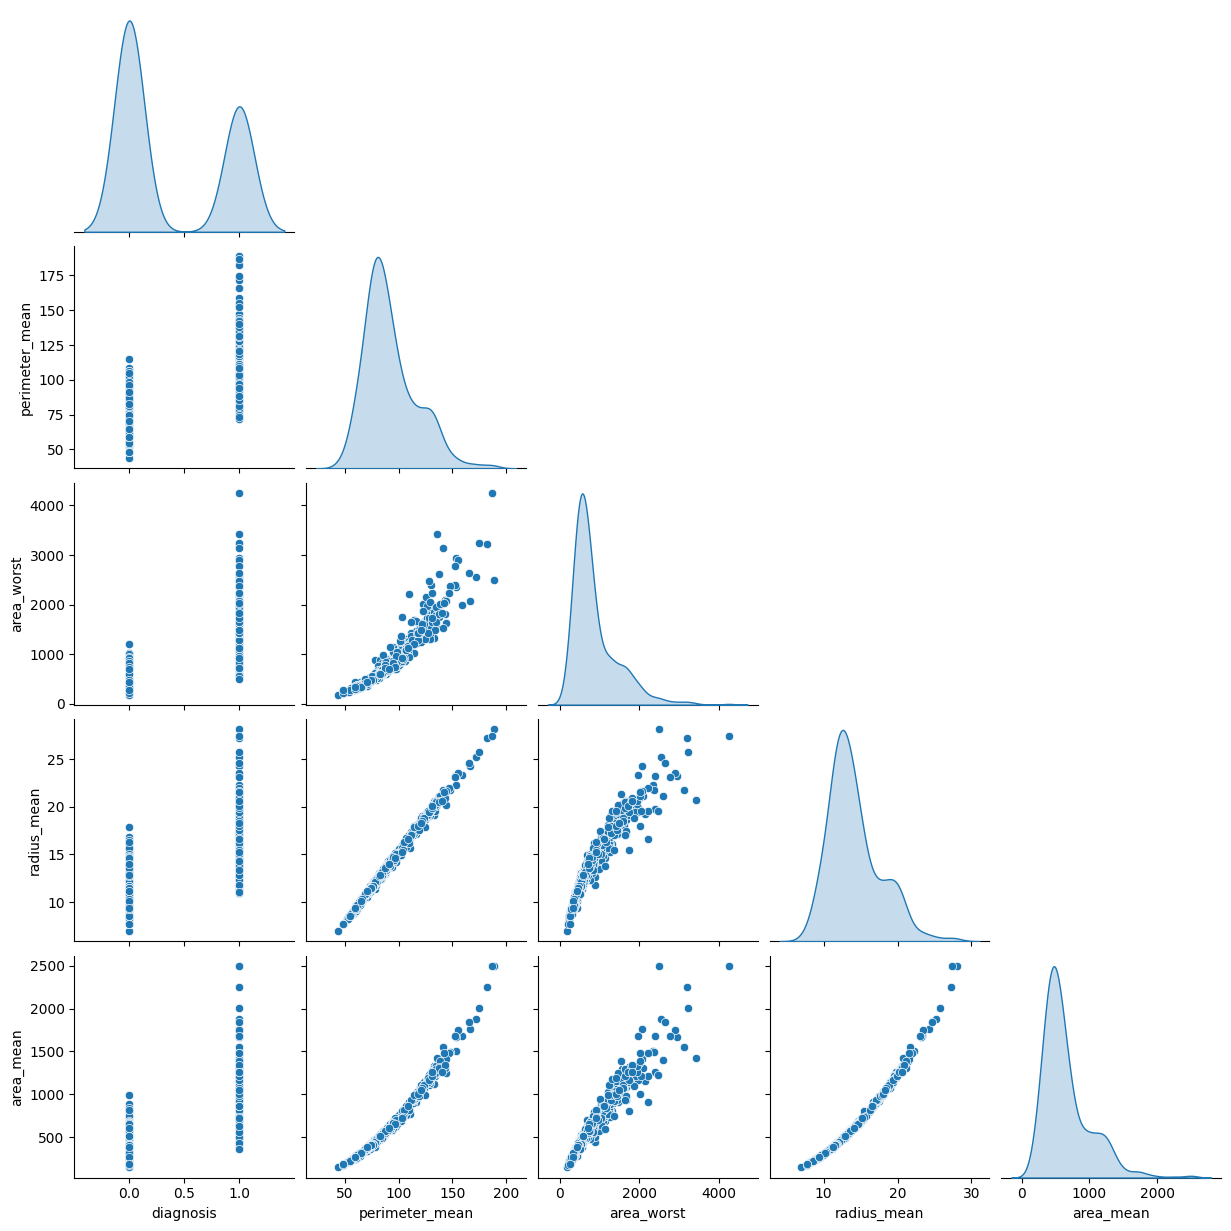

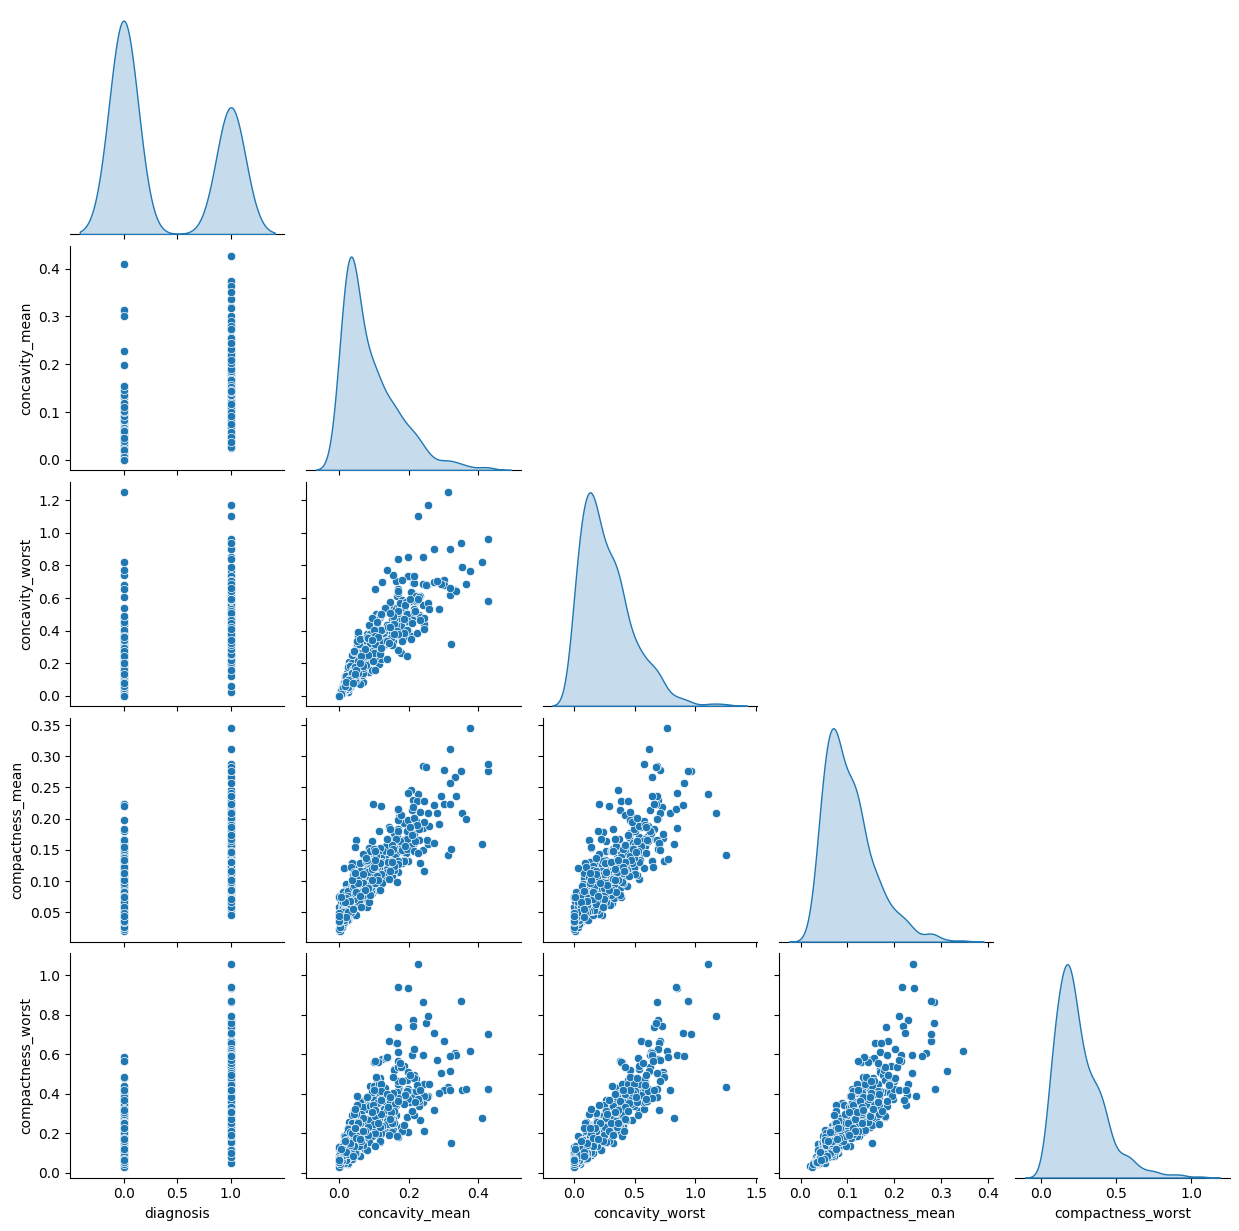

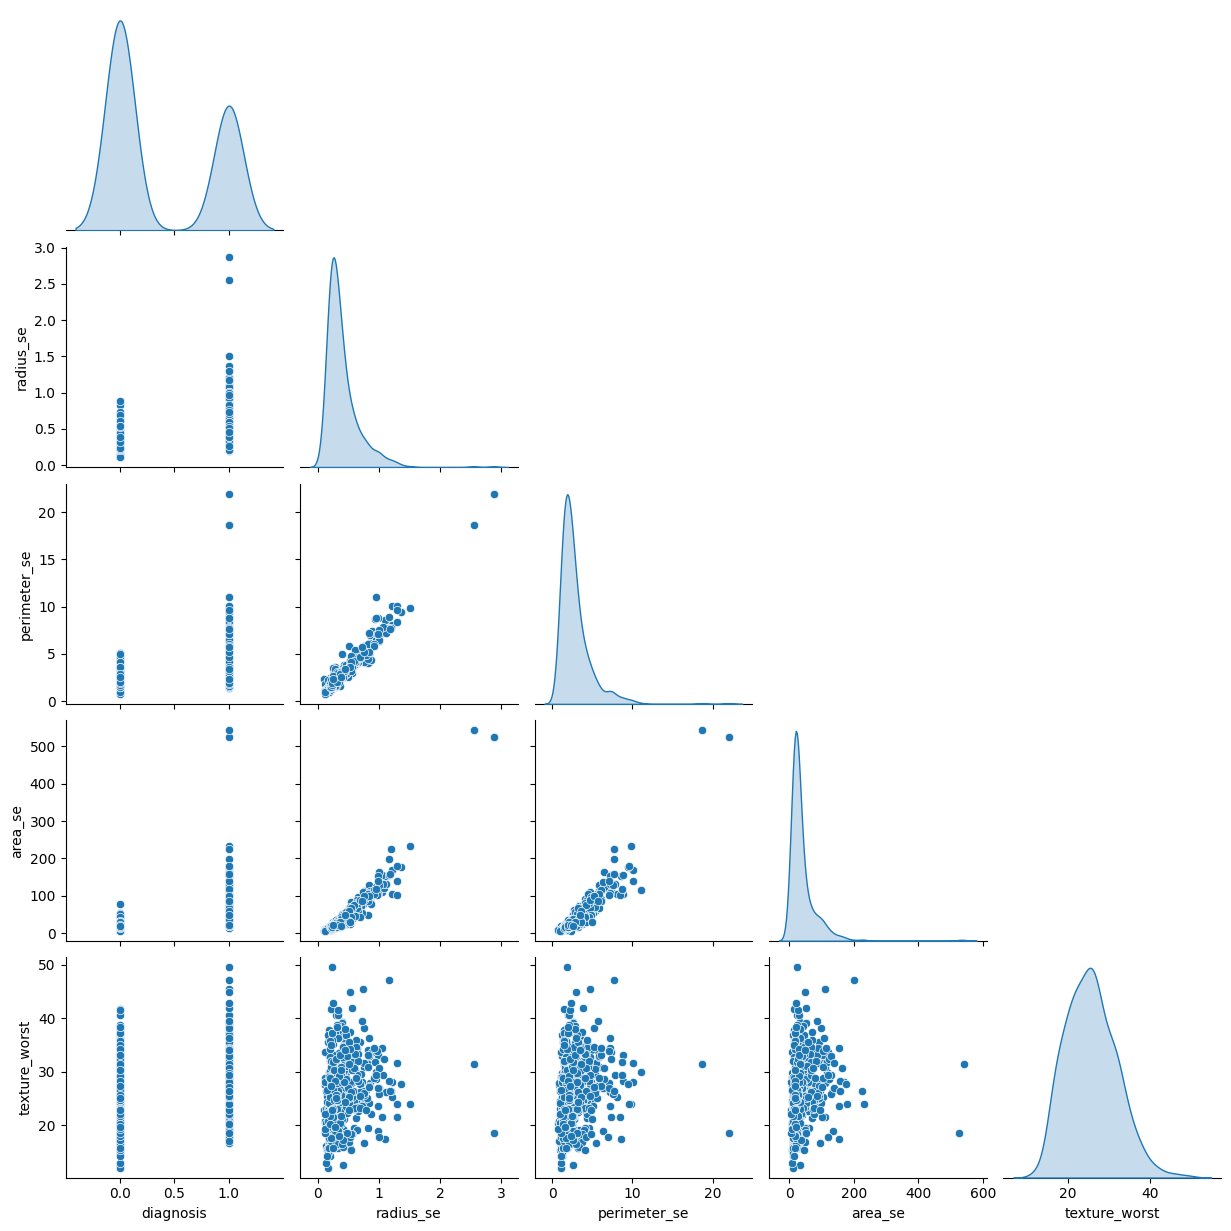

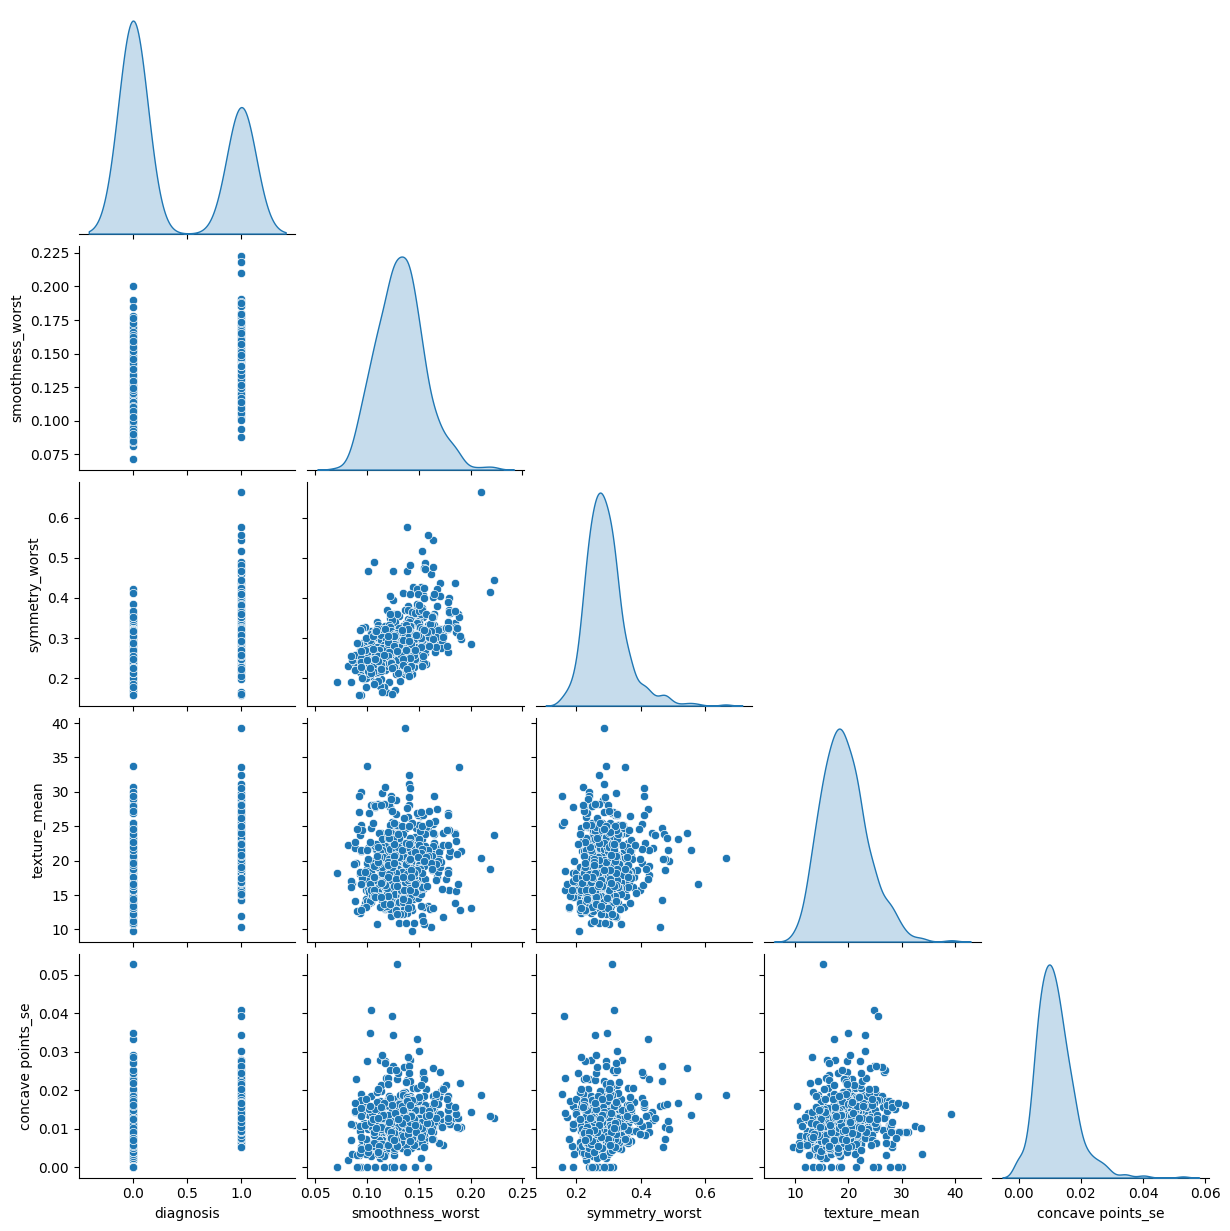

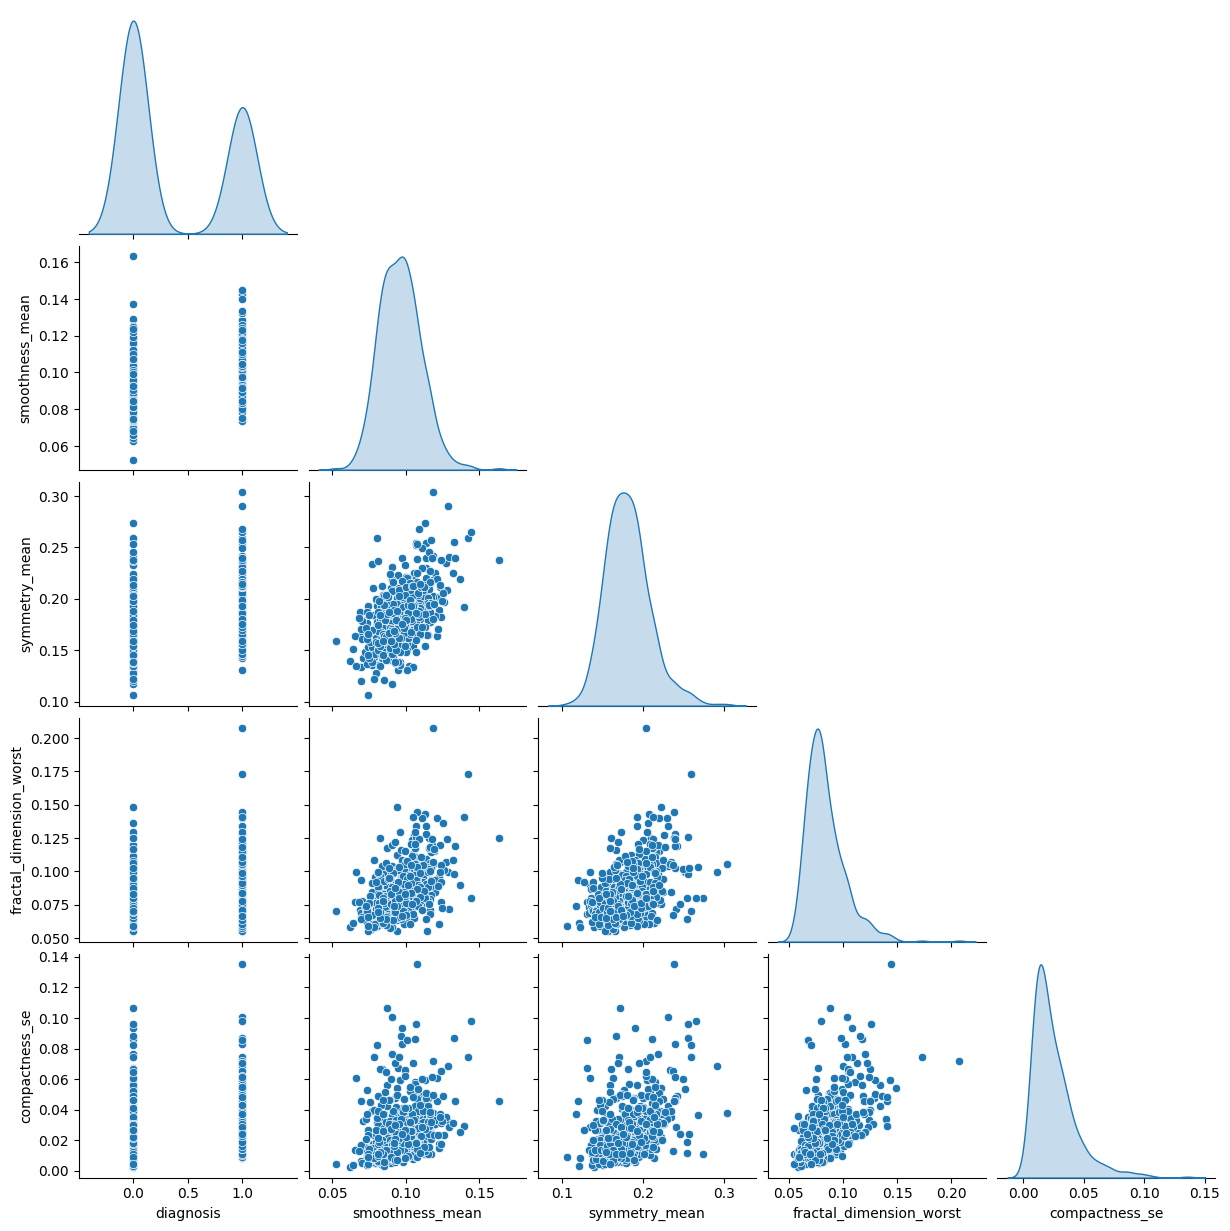

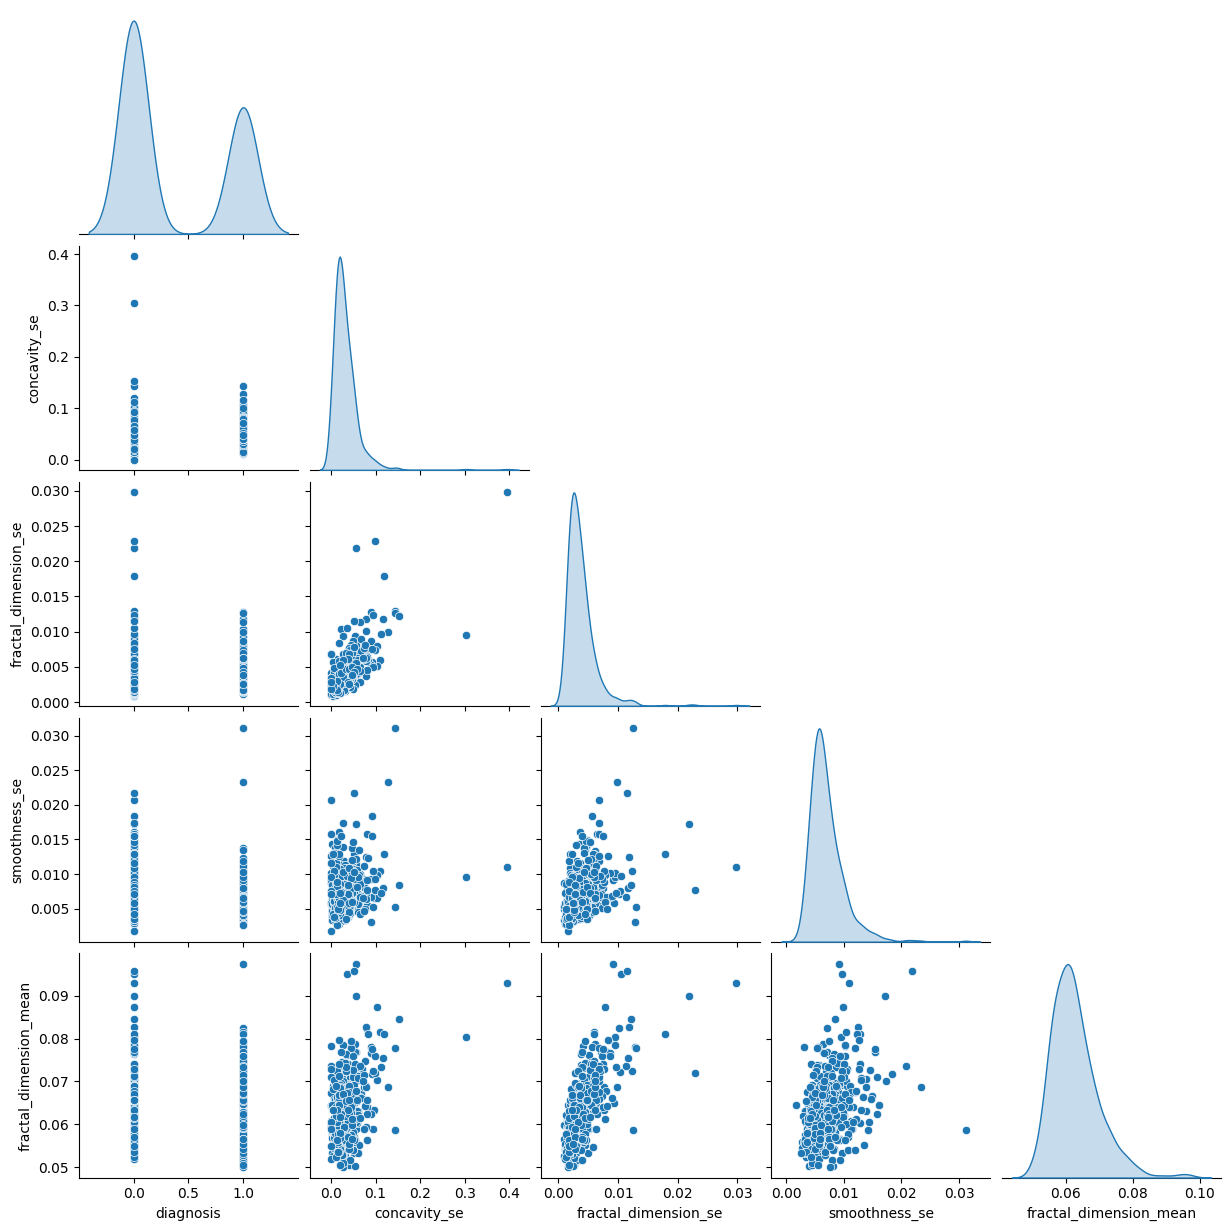

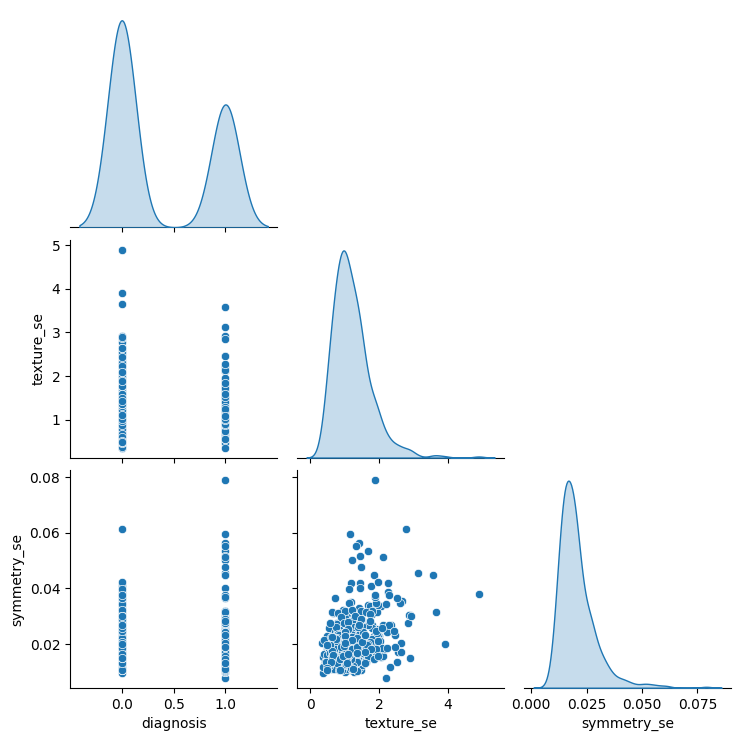

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst',
 'compactness_mean',
 'compactness_worst',
 'radius_se',
 'perimeter_se',
 'area_se',
 'texture_worst',
 'smoothness_worst',
 'symmetry_worst',
 'texture_mean',
 'concave points_se',
 'smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_worst',
 'compactness_se',
 'concavity_se',
 'fractal_dimension_se',
 'smoothness_se',
 'fractal_dimension_mean',
 'texture_se',
 'symmetry_se']

In [10]:
bt.plot_features_num_regression(df, target_col = target)

In [11]:
features_segunda = ["texture_se","smoothness_se","simmetry_se","fractal_dimension_se"]

# Las dos últimas, aunque tienen cierta capacidad discriminativa, las quito porque el resto es más evidente que aportan*

In [12]:
features_visual = [col for col in train_set.columns if col not in features_segunda]
features_visual.remove(target)

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

In [13]:
df["diagnosis"]= df["diagnosis"].replace({0:"B", 1:"M"})

<Axes: >

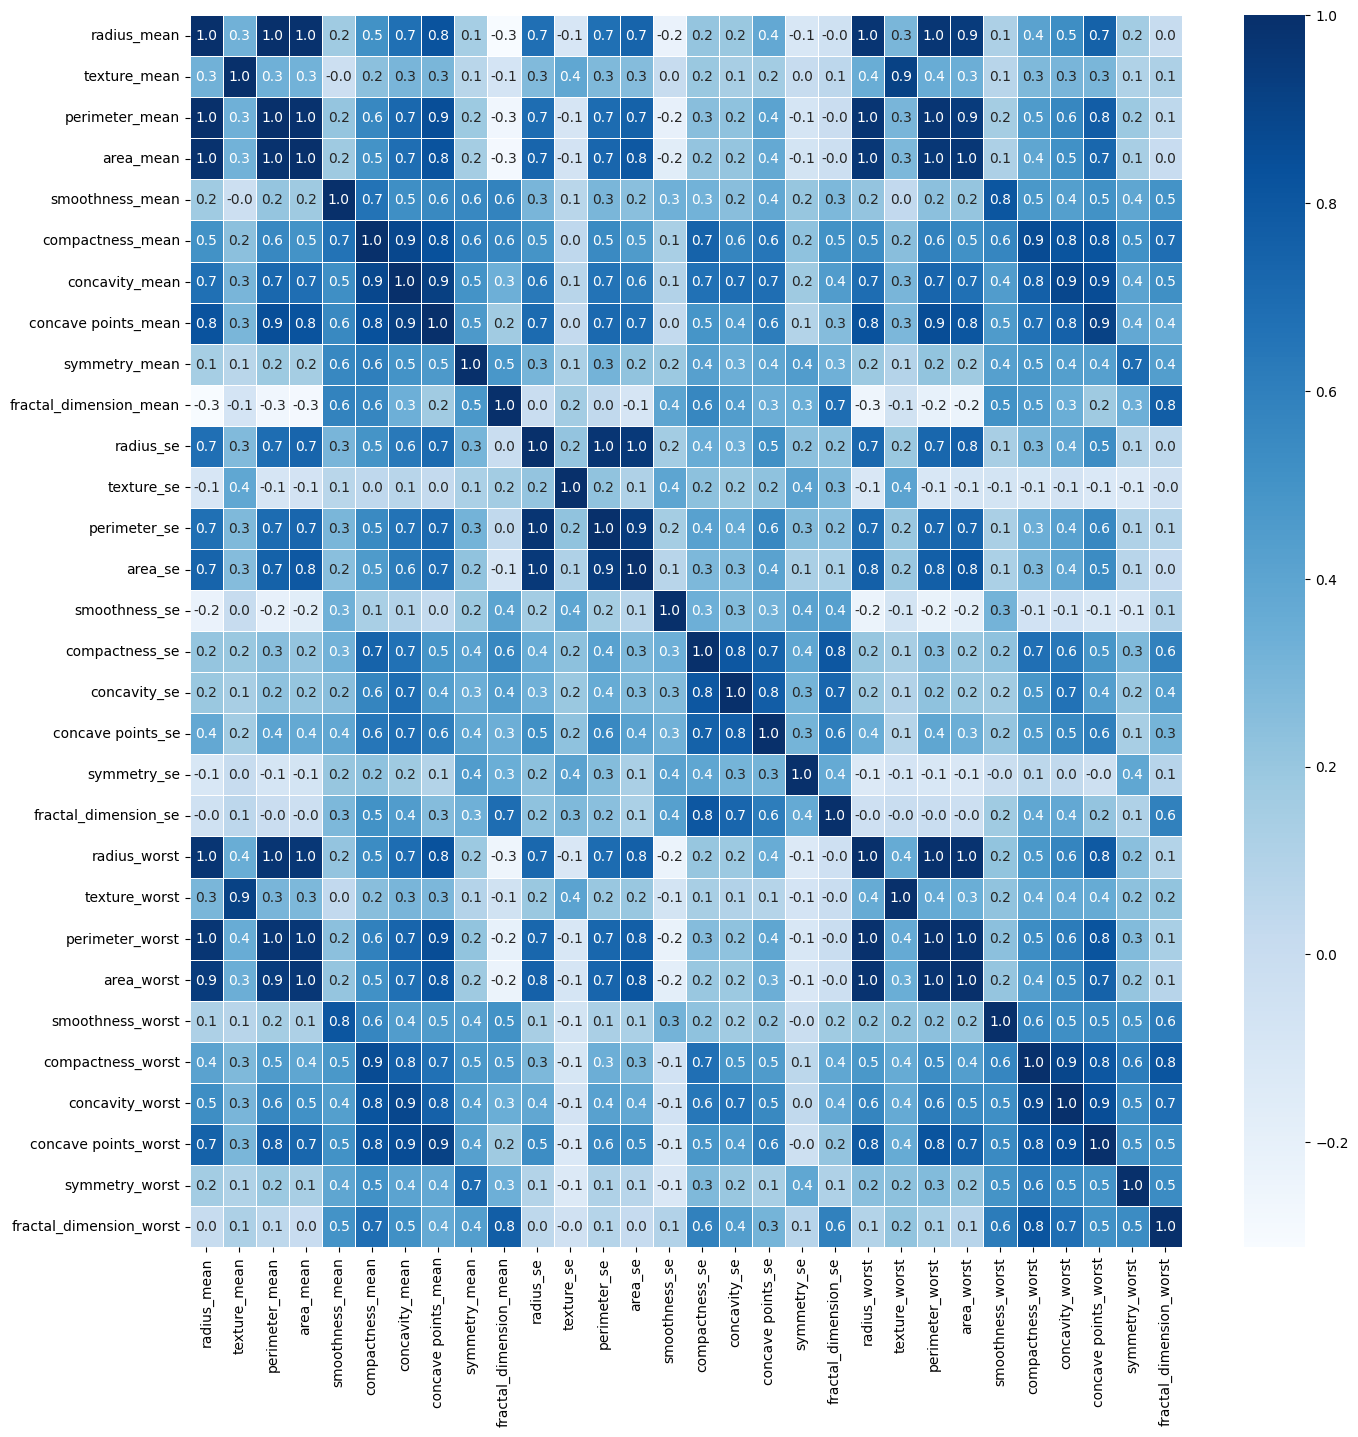

In [14]:
#heat map
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', linewidths=.5, fmt= '.1f')

In [15]:
# Hay varias con correlacion 1 lo que indica que son redundantes, por lo que se pueden quitar

### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [16]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]

In [17]:
# Instanciar
rfc = RandomForestClassifier(max_depth=5,
                                random_state=42)

# Entrenar
rfc.fit(X_train, y_train)
 

RandomForestClassifier(max_depth=5, random_state=42)

In [18]:
# Variable baseline
baseline = np.mean(cross_val_score(rfc,
                                   X_train,
                                   y_train, 
                                   scoring = "balanced_accuracy", 
                                   cv = 5))
print(f"Baseline: {baseline}%")

Baseline: 0.9539121868843232%


### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

In [19]:
# COLINEALIDAD

# Definir umbral de colinealidad
umbral_colinealidad = 0.7  # Ajusta según necesidad

# Filtrar la matriz de correlación solo con las features seleccionadas
corr_features = train_set[features_visual].corr().abs()

# Obtener pares de variables altamente correlacionadas
colineales = []
for i in range(len(features_visual)):
    for j in range(i + 1, len(features_visual)):  
        if corr_features.iloc[i, j] >= umbral_colinealidad:
            colineales.append((features_visual[i], features_visual[j], corr_features.iloc[i, j]))

# Crear DataFrame con los pares de variables colineales
df_colineales = pd.DataFrame(colineales, columns=["Feature_1", "Feature_2", "Correlacion"])
df_colineales["Correlacion"] = df_colineales["Correlacion"].round(2)

# Mostrar resultado
df_colineales

Feature_1                Feature_2  Correlacion
0         radius_mean           perimeter_mean         1.00
1         radius_mean                area_mean         0.99
2         radius_mean      concave points_mean         0.81
3         radius_mean                  area_se         0.72
4         radius_mean             radius_worst         0.97
..                ...                      ...          ...
60         area_worst     concave points_worst         0.74
61  compactness_worst          concavity_worst         0.89
62  compactness_worst     concave points_worst         0.81
63  compactness_worst  fractal_dimension_worst         0.80
64    concavity_worst     concave points_worst         0.85

[65 rows x 3 columns]

In [22]:
# Paso 1: Crear una lista vacía para almacenar las variables colineales
list_colineales = []

# Paso 2: Iterar sobre los pares de variables colineales
for pair in colineales:
    feature_1 = pair[0]  # Primera variable del par
    feature_2 = pair[1]  # Segunda variable del par

    # Paso 3: Agregar las variables a la lista
    list_colineales.append(feature_1)
    list_colineales.append(feature_2)

# Paso 4: Eliminar duplicados convirtiendo la lista en un conjunto y luego de vuelta a lista
list_colineales = list(set(list_colineales))

# Mostrar el resultado final
print(f"Lista de {len(list_colineales)} features con alta colinealidad:")
print(list_colineales)


Lista de 24 features con alta colinealidad:
['area_mean', 'compactness_mean', 'concave points_worst', 'radius_worst', 'texture_worst', 'fractal_dimension_worst', 'concavity_mean', 'texture_mean', 'concavity_worst', 'area_worst', 'area_se', 'perimeter_mean', 'fractal_dimension_mean', 'radius_mean', 'perimeter_se', 'concavity_se', 'perimeter_worst', 'smoothness_worst', 'concave points_se', 'compactness_worst', 'radius_se', 'concave points_mean', 'smoothness_mean', 'compactness_se']


In [24]:
# Convert target variable to numerical values
train_set[target] = train_set[target].replace({"B": 0, "M": 1})

# SELECCIÓN DE AQUELLAS CON CORRELACIÓN MAS ALTA CON TARGET

# Ordenar por correlación con target
corr_target = np.abs(train_set.corr()[target]).sort_values(ascending=False)

# Lista de variables a excluir
descartadas = []

# Revisar pares colineales y excluir la menos correlacionada con el target
for _, row in df_colineales.iterrows():
    f1, f2 = row["Feature_1"], row["Feature_2"]
    if f1 not in descartadas and f2 not in descartadas:
        if corr_target[f1] >= corr_target[f2]:
            descartadas.append(f2)
        else:
            descartadas.append(f1)

# Obtener las features finales
set_reducido = [f for f in features_visual if f not in descartadas]

excluidas_final = list(descartadas) + list(features_segunda)

# Mostrar resultados
print(f"\nVariables analizadas por alta colinealidad:\n{list_colineales}")
print(f"\nVariables DESCARTADAS (alta colinealidad pero su par tiene mayor correlación con target):\n{descartadas}")
print("\n\n_ _ _ _ _ _ _ RESUMEN _ _ _ _ _ _ _ ")
print(f"\nFeatures EXCLUIDAS por baja correlación con target:\n{features_segunda}")
print(f"\nFeatures alta correlación:\n{features_visual}")
print(f"\nFEATURES -> Total de {len(list(train_set.columns.drop(target)))} features (todas, sin target):\n{list(train_set.columns.drop(target))}")
print(f"\nSET REDUCIDO-> {len(set_reducido)} variables seleccionadas:\n{set_reducido}")
print(f"\nEXCLUIDAS -> Un total de {len(excluidas_final)} variables finales excluidas (descartadas y excluidas previamente):\n{excluidas_final}")
print(f"\nTARGET:\n'{target}'")


Variables analizadas por alta colinealidad:
['area_mean', 'compactness_mean', 'concave points_worst', 'radius_worst', 'texture_worst', 'fractal_dimension_worst', 'concavity_mean', 'texture_mean', 'concavity_worst', 'area_worst', 'area_se', 'perimeter_mean', 'fractal_dimension_mean', 'radius_mean', 'perimeter_se', 'concavity_se', 'perimeter_worst', 'smoothness_worst', 'concave points_se', 'compactness_worst', 'radius_se', 'concave points_mean', 'smoothness_mean', 'compactness_se']

Variables DESCARTADAS (alta colinealidad pero su par tiene mayor correlación con target):
['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_mean', 'fractal_dimension_mean', 'perimeter_se', 'area_se', 'concavity_se', 'compactness_se', 'compactness_worst']


_ _ _ _ _ _ _ RESUMEN _ _ _ _ _ _ _ 

Features EXCLUIDAS por baja correlación con target:
['texture_se

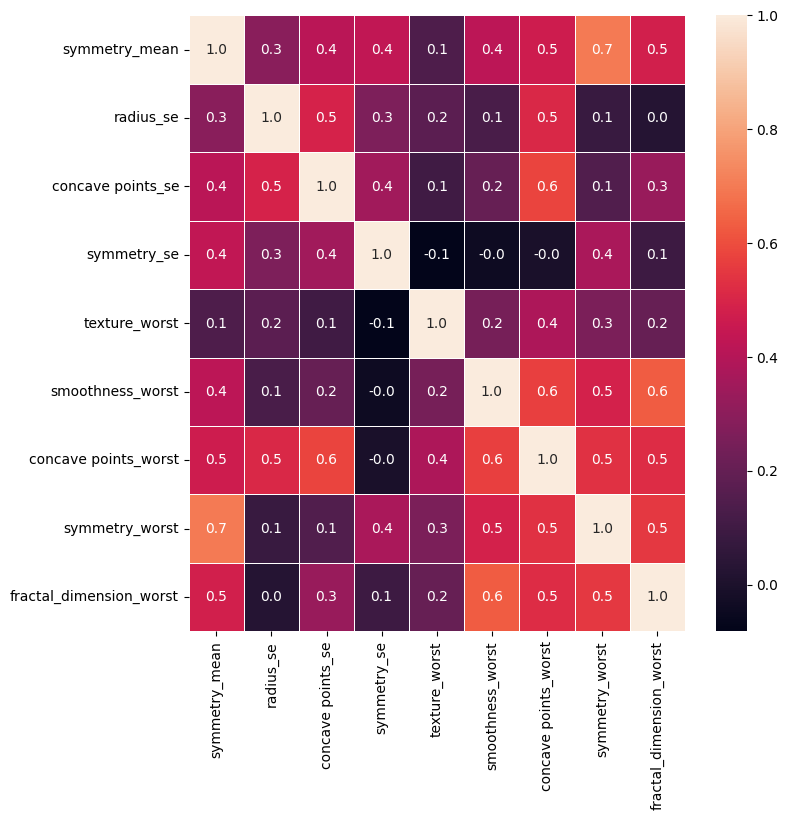

In [25]:
#correlation map
plt.figure(figsize=(8, 8))
sns.heatmap(X_train[set_reducido].corr(), annot=True, linewidths=.5, fmt= '.1f');

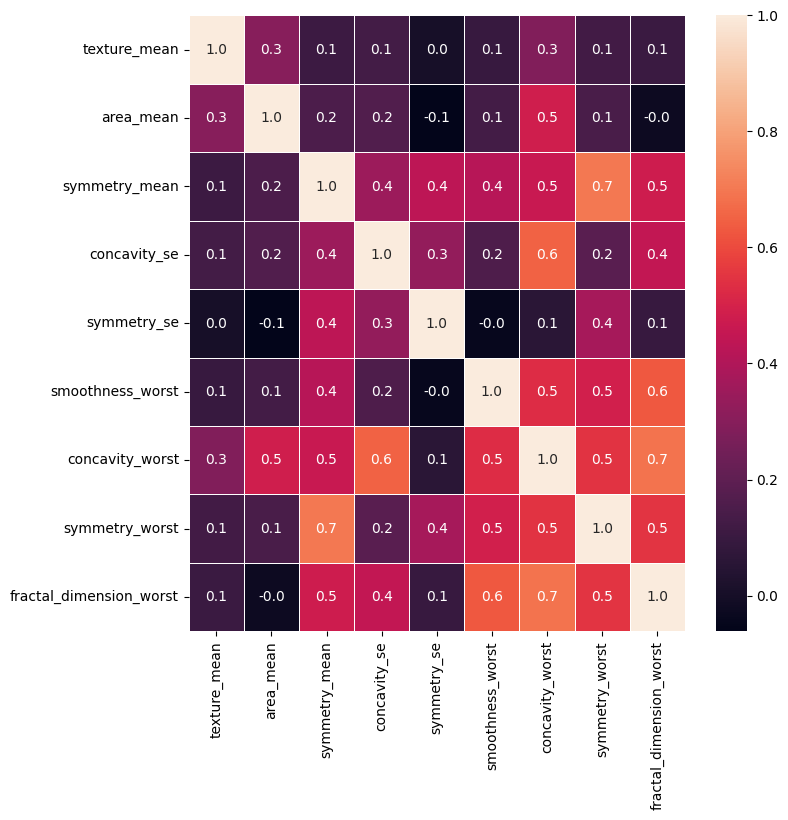

In [27]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean',
             'concave points_mean','radius_se','perimeter_se',
             'radius_worst','perimeter_worst','compactness_worst',
             'concave points_worst','compactness_se','concave points_se',
             'texture_worst','area_worst', 'area_se', 'concavity_mean',
             'fractal_dimension_mean','smoothness_mean']

features_visual_final  = [col for col in features_visual if col not in drop_list]

#correlation map
plt.figure(figsize=(8, 8))
sns.heatmap(X_train[features_visual_final].corr(), annot=True, linewidths=.5, fmt= '.1f');

### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [ ]:
#Train test split
X_train_visual = X_train[features_visual_final]

#Random Forest Classifier
rfc_1 = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_depth=5)

visual_score = np.mean(cross_val_score(rfc_1, 
                                       X_train_visual, 
                                       y_train, 
                                       cv = 5, 
                                       scoring= "balanced_accuracy"))

num_feats_visual = len(features_visual_final)
num_feats_baseline = len(X_train.columns)

print(f"Visual: {round(visual_score*100.0,2)} %/ {len(features_visual_final)} feats. vs Baseline: {round(baseline*100.0,2)} %/ {num_feats_baseline} feats.")

Visual: 95.06 %/ 9 feats. vs Baseline: 95.39 %/ 30 feats.


In [ ]:

#Train test split
X_train_visual_2 = X_train[set_reducido]

#Random Forest Classifier
rfc_2 = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_depth=5)

visual_score_2 = np.mean(cross_val_score(rfc_2, 
                                       X_train_visual_2, 
                                       y_train, 
                                       cv = 5, 
                                       scoring= "balanced_accuracy"))

num_feats_visual_2 = len(set_reducido)
num_feats_baseline = len(X_train.columns)

print(f"Visual: {round(visual_score_2*100.0,2)} %/ {len(set_reducido)} feats. vs Baseline: {round(baseline*100.0,2)} %/ {num_feats_baseline} feats.")

Visual: 93.1 %/ 9 feats. vs Baseline: 95.39 %/ 30 feats.


### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [ ]:
selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train)

X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest

texture_mean  area_mean  smoothness_worst  concavity_worst  \
0           17.33      250.5           0.14820          1.25200   
1           26.57     1311.0           0.14910          0.67800   
2           13.86      260.9           0.09836          0.13970   
3           25.22      347.0           0.14990          0.11250   
4           14.88      311.9           0.12750          0.02168   
..            ...        ...               ...              ...   
450         14.64      244.0           0.12070          0.14340   
451         18.33      412.5           0.16880          0.28730   
452         16.82      632.6           0.08567          0.03866   
453         19.62      599.5           0.16130          0.40690   
454         20.52      458.7           0.11230          0.11450   

     symmetry_worst  
0            0.4228  
1            0.4098  
2            0.3282  
3            0.3409  
4            0.3557  
..              ...  
450          0.2254  
451          0.2806  
452          0.2458  
453          0.3179  
454          0.2694  

[455 rows x 5 columns]

In [35]:
best_features_sorted = pd.DataFrame({'Feature': X_train.columns, 'Score': selector.scores_}).sort_values(by='Score', ascending=False)
features_anova = selector.get_feature_names_out()
best_features_sorted.head()

Feature       Score
27  concave points_worst  746.492117
7    concave points_mean  695.179785
22       perimeter_worst  681.263759
20          radius_worst  645.350668
2         perimeter_mean  522.489267

In [53]:

#Seleccionamos los tres DATAFRAMES
for nombre,set in zip(["Visual",   # X_train_model
                       "ANOVA",             # X_train_kbest
                       "Baseline"],            # X_train[features_num]
                       [X_train_visual, 
                        X_train_kbest, 
                        X_train]):
    
    print(f"Para el dataset <{nombre}>: num_features: {len(set.columns.to_list())}, score:", sep = " ")
    print(round(np.mean(cross_val_score(rfc_1, 
                                        set, 
                                        y_train, 
                                        cv = 5, 
                                        scoring = "balanced_accuracy")), 4))
    

Para el dataset <Visual>: num_features: 9, score:
0.9506
Para el dataset <ANOVA>: num_features: 5, score:
0.956
Para el dataset <Baseline>: num_features: 30, score:
0.9539


In [52]:
X_train_visual.head(0)

Empty DataFrame
Columns: [texture_mean, area_mean, symmetry_mean, concavity_se, symmetry_se, smoothness_worst, concavity_worst, symmetry_worst, fractal_dimension_worst]
Index: []

In [51]:
X_train_kbest.head(0)

Empty DataFrame
Columns: [texture_mean, area_mean, smoothness_worst, concavity_worst, symmetry_worst]
Index: []

### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.